# 3. Supervised learning algorithm (지도 학습 알고리즘)

## 3-1. 예제에 사용할 데이터셋

X.shape: (26, 2)


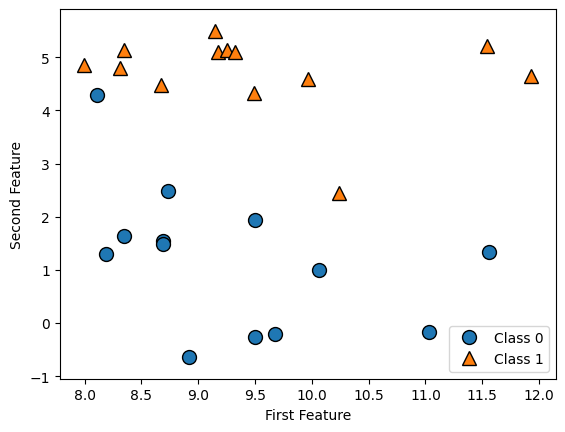

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 두 개의 특성을 가진 인위적으로 만든 이진 분류 데이터셋인 forge 데이터셋을 생성
X, y = mglearn.datasets.make_forge()
# 산점도를 생성
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape:", X.shape);

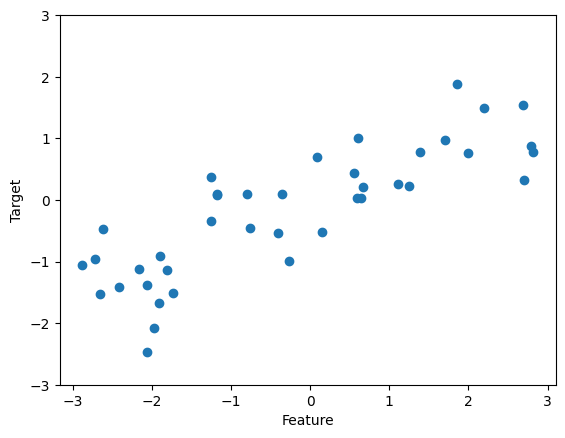

In [5]:
# 희귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target");

In [6]:
# scikit-learn에 있는 load_breast_cancer 함수를 사용하여 불러올 수 있음
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.key():\n", cancer.keys())

cancer.key():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
# 이 데이터셋은 569개의 데이터 포인트를 가지고 있고 특성은 30개
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [8]:
# 569개 데이터 포인트 중 212개는 악성이고 357개는 양성
print("클래스별 샘플 개수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [9]:
# feature_names 속성을 확인
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## 3-2. k-최근접 이웃
- k-최근접(k-Nearest Neighbors) 알고리즘은 가장 간단한 머신러닝 알고리즘
- 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 때는 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트, 즉 '최근접 이웃'을 찾음
### k-최근접 이웃 분류

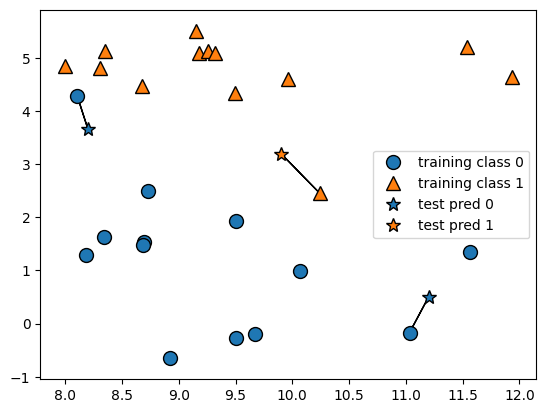

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

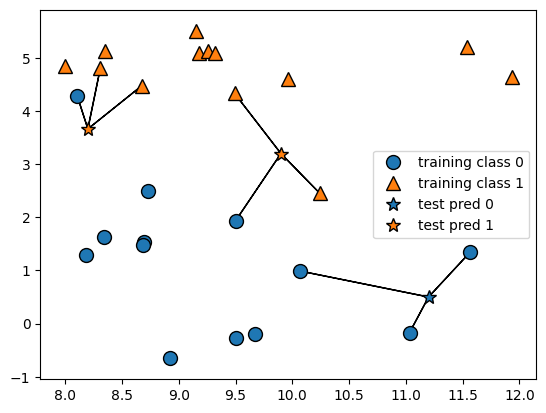

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
# 훈련 세트를 사용하여 분류 모델을 학습
# KNeighborsClassifier에서의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [18]:
# 모델이 얼마나 잘 일반화되었는지 평가하기 위해 score 메서드에 테스트 데이터와 테스트 레이블을 넣어 호출
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분석
- 2차원 데이터셋이므로 가능한 모든 테스트 포인트 예측을 xy 평면에 그려볼 수 있음
- 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하면 알고리즘의 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정 경계(decision boundary)를 볼 수 있음

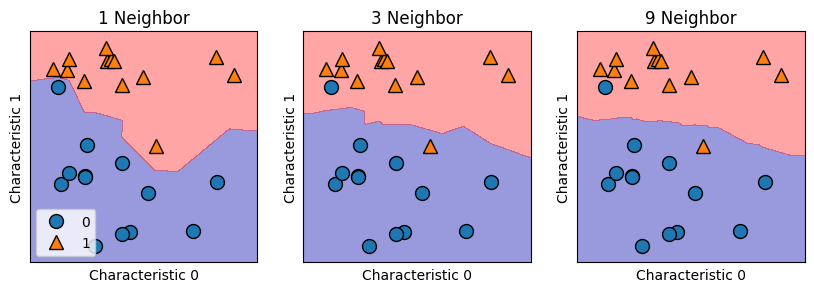

In [19]:
# 이웃이 1, 3, 9 개일 때의 결정 경계를 보여줌
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  # fit 메서드는 self 오브젝트를 리턴
  # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있음
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{} Neighbor".format(n_neighbors))
  ax.set_xlabel("Characteristic 0")
  ax.set_ylabel("Characteristic 1")
axes[0].legend(loc=3);

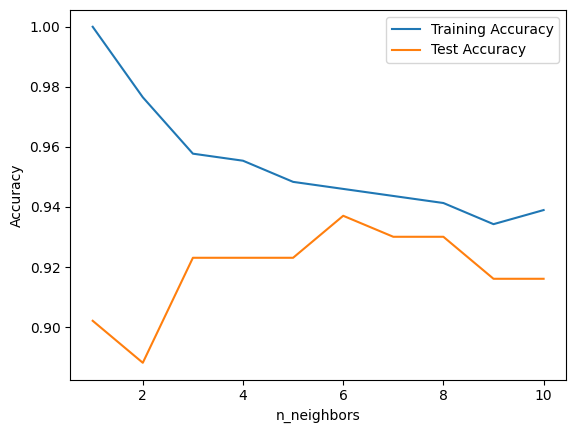

In [20]:
# 모델의 복잡도와 일반화 사이의 관계를 입증
# 훈련 세트와 테스트 세트로 나누고, 이웃의 수를 달리하여 훈련 세트와 테스트 세트의 성능을 평가
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

### k-최근접 이웃 회귀

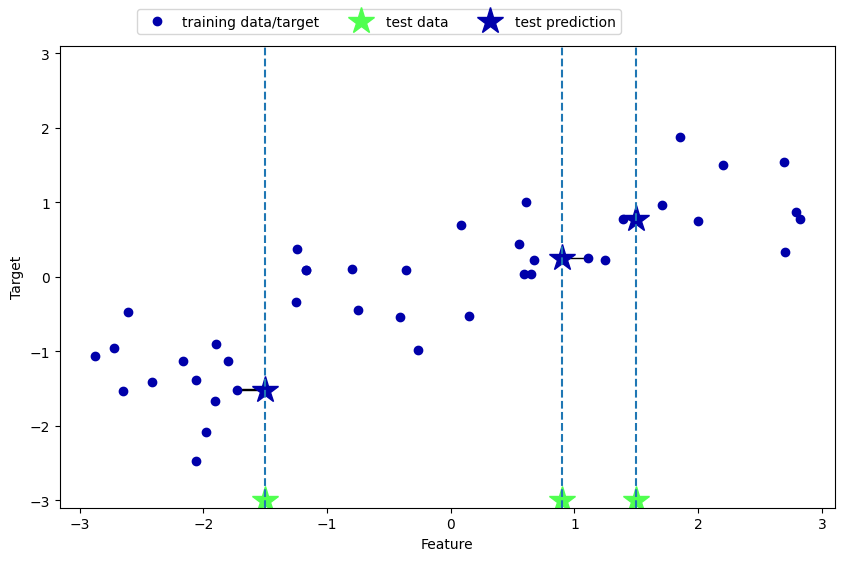

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

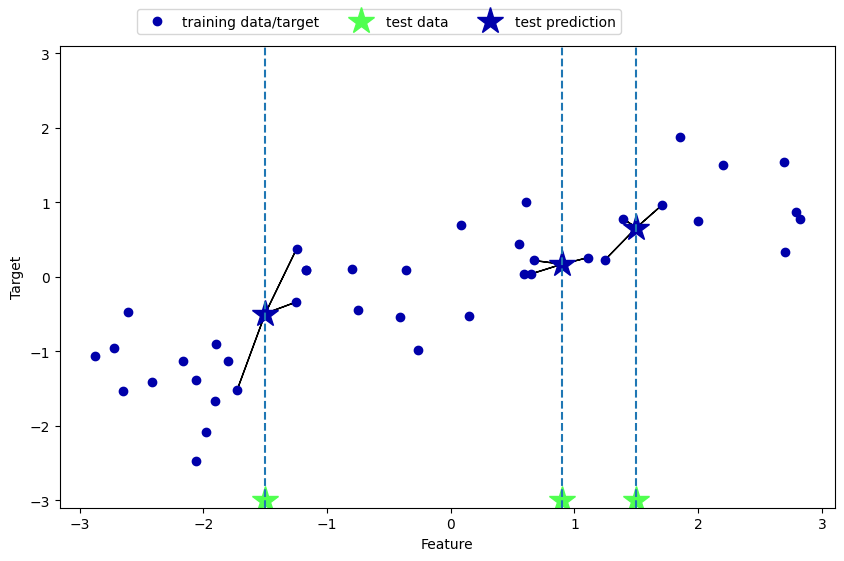

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
# scikit-learn에서 회귀를 위한 k-최근접 이웃 알고리즘은 KNeighborsRegressor에 구현되어있음
# 사용범은 KNeighborsClassifier와 유사
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듦
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [25]:
# 결정 계수인 R^2값은 회귀 모델에서 예측의 적합도를 측정한 것으로 보통 0에서 1 사이의 값임
# 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우
# R^2은 음수가 되는 경우, 예측과 타깃이 상반된 경향을 가지는 경우
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


### KNeighborsRegressor 분석
- 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어 예측해볼 수 있음
- x축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만듦

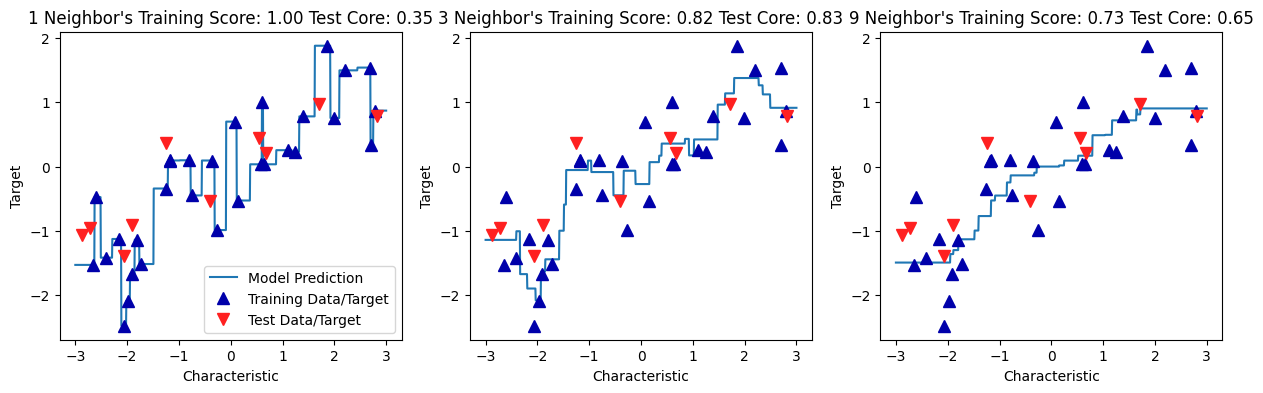

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1000개의 데이터 포인트를 만듦
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  # 1, 3, 9 이웃을 사용한 예측을 함
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title("{} Neighbor's Training Score: {:.2f} Test Core: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
  ax.set_xlabel("Characteristic")
  ax.set_ylabel("Target")
axes[0].legend(["Model Prediction", "Training Data/Target",
                "Test Data/Target"], loc="best");

이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만, 더 안정된 예측을 얻을 수 있음

### 장단점과 매개변수
- 일반적으로 KNeighbors 분류기에 중요한 매개변수는 '데이터 포인트 사이의 거래를 재는 방법'과 '이웃의 수'
- 실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동하지만, 이 매개변수는 잘 조정해야 함
- 거리 재는 방법은 기본적으로 여러 환경에서 잘 작동하는 유클리디안 거리 방식을 사용
- k-NN의 장점은 이해하기 매우 쉬운 모델이고 많이 조정하지 않아도 자주 좋은 성능을 발휘할 수 있으므로, 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점
- 보통 최근점 이웃 모델은 매우 빠르게 만들 수 있지만, 훈련 세트가 매우 크면 (특성의 수나 샘플의 수가 클 경우) 예측이 느려짐
- k-NN 알고리즘을 사용할 땐 데이터를 전처리하는 과정이 중요
- (수백 개 이상의) 많은 특성을 가진 데이터셋에는 잘 동작하지 않으며, 특성 값 대부분이 0인 (희소한) 데이터셋과는 특히 잘 작동하지 않음
- k-최근접 이웃 알고리즘이 이해하긴 쉽지만 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않음

## 3-3. 선형 모델 (Linear Model)
- 선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행

w[0]: 0.393906  b: -0.031804


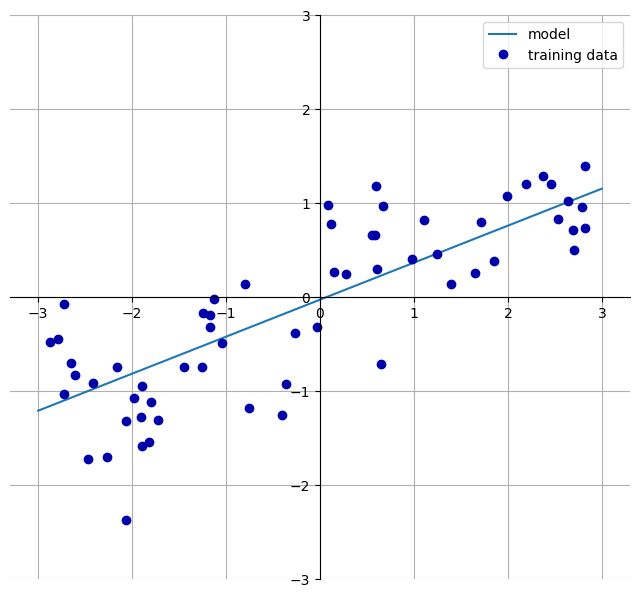

In [27]:
mglearn.plots.plot_linear_regression_wave()

### 선형 회귀 (Linear Regrssion) or 최소제곱법 (OLS, Ordinary Least Squares)
- 선형 회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(Mean Squared Error)를 최소화하는 파라미터 w와 b를 찾음
- 평균제곱오차는 예측값과 타깃 값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것
- 선형 회귀는 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법도 없음

In [28]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

- 기울기 파라미터(w)는 가중치(weight) 또는 계수(coefficient)라고 하며 lr 객체의 coef_ 속성에 저장되어 있음
- 편향(offset) 또는 절편(intercept) 파라미터(b)는 intercept_ 속성에 저장되어 있음
- coef_와 intercept_ 뒤의 항상 밑줄을 붙이는 이유는 scikit-learn에서 사용자가 지정한 매개변수와 훈련 데이터에서 유도된 속성을 구분하기 위한 목적

In [29]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


- intercept_ 속성은 항상 실수 값 하나지만, coef_ 속성은 각 입력 특성에 하나씩 대응되는 NumPy 배열
- wave 데이터셋에는 입력 특성이 하나뿐이므로 lr.coef_도 원소를 하나만 가지고 있음

In [30]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


- R^2 값이 0.66인 것은 그리 좋은 결과는 아니지만, 훈련 세트와 테스트 세트의 점수가 매우 비슷한데, 이는 과대적합이 아니라 과소적합인 상태를 의미
- 1차원 데이터셋에서는 모델이 매우 단순하므로 (혹은 제한적이므로) 과대 적합을 걱정할 필요가 없음
- 반면, (특성이 많은) 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높음

In [31]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


- 훈련 세트와 테스트 세트의 점수를 비교해보면 훈련 세트에서는 예측이 매우 정확한 반면 테스트 세트에서는 R^2 값이 매우 낮음
- 훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 함

### 리지 회귀 (Ridge Regression)
- 리지도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용
- 리지 회귀에서의 가중치(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있음
- 가중치의 절댓값을 가능한 작게 만드는 것. 다시 말해서 w의 모든 원소가 0에 가깝게 되길 원함
- 직관적으로 생각하면 이는 모든 특성이 출력에 주는 영향을 최소한으로 만듦(기울기를 작게 만듦)
- 이런 제약을 규제(Regularization)이라고 함. 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미
- 리지 회귀에 사용하는 규제 방식을 L2규제라고 함

In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- 결과를 보니 훈련 세트에서의 점수는 LinearRegression보다 낮지만 테스트 세트에 대한 점수는 더 높음
- 선형 회귀는 이 데이터셋에 과대적합되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어짐
- 모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 됨
- 관심 있는 것은 테스트 세트에 대한 성능이기 때문에 LinearRegression보다 Ridge 모델을 선택해야 함
- Ridge는 모델을 단순하게 (계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공
- 사용자는 alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있음
- 앞의 예제에서는 매개변수의 기본값인 alpha=1.0을 사용했지만, 이 값이 최적이라고 생각할 이유는 없음
- 최적의 alpha 값은 사용하는 데이터셋에 달렸기에, alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있음

In [34]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [35]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


- alpha=0.1이 꽤 좋은 성능을 낼 것으로 보이므로, 태스트 세트에 대한 성능이 높아질때까지 alpha 값을 줄일 수 있을 것
- alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 조사해보면 alpha 매개변수가 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있음
- 높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_의 절댓값 크기가 작을 것이라고 예상할 수 있음

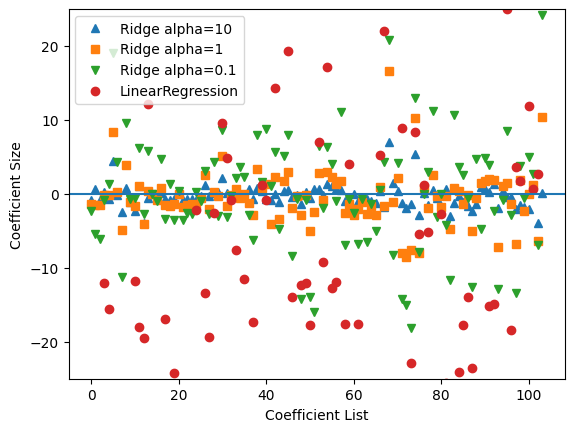

In [36]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient List")
plt.ylabel("Coefficient Size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend();

- x축은 coef_의 원소를 위치대로 나열한 것. x=0은 첫 번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수. 이런 식으로 x=100까지 계속됨
- y축은 각 계수의 수치를 나타냄. alpha=10일 때 대부분의 계수는 -3과 3 사이에 위치
- alpha=1 인 경우, Ridge 모델의 계수는 좀 더 커졌음
- alpha=0.1 인 경우, 계수는 더 커지며 아무런 규제가 없는(alpha=0) 선형 회귀의 계쑤는 값이 더 커져 그림 밖으로 넘어감
- 규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜보는 것
- 학습 곡선 (Learning Curve) : 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프

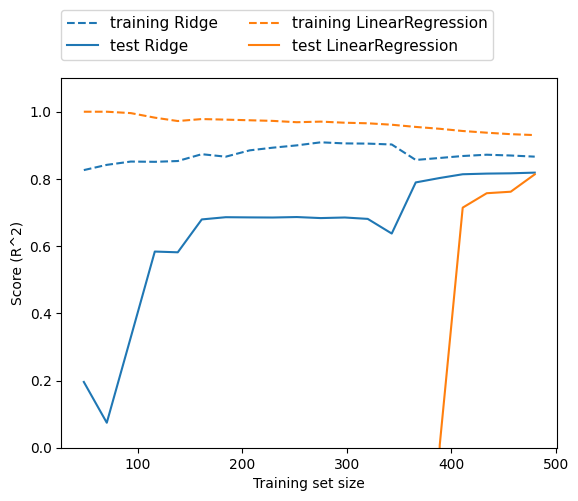

In [37]:
mglearn.plots.plot_ridge_n_samples()

- 예상대로 모든 데이터셋에 대해 리지와 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높음
- 리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮음
- 반면 테스트 데이터에서는 리지의 점수가 더 높으며 특별히 작은 데이터셋에서는 더 강조됨
- 데이터셋 크기가 400 미만에서는 선형 회귀는 어떤 것도 학습하지 못하고있음
- 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 리지 회귀를 따라잡음
- 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것
- 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문에 선형 회귀의 훈련 데이터 성능이 감소하는 것으로 나타남

### 라소 (Lasso)
- 라소는 선형회귀 규제를 적용하는 데 Ridge의 대안으로 사용
- 라소도 계수를 0에 가깝게 만들려고 함
- 라소의 계수가 완벽히 0이 되는경우, 모델에서 완전히 제외되는 특성이 생긴다는 뜻
- 일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 해당 모델의 가장 중요한 특성이 무엇인지 표현해 줌

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [39]:
# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


- alpha 값을 낮추면 모델의 복잡도는 증가, 훈련 세트와 테스트 세트에서의 성능이  좋아짐
- 성능은 Ridge보다 조금 나은데 사용된 특성은 104개 중 33개뿐이어서, 모델을 분석하기 더 쉬움
- alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 유사해짐

In [40]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


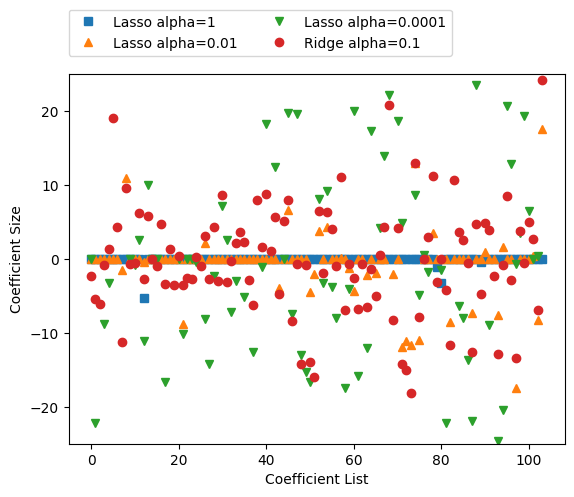

In [41]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient List")
plt.ylabel("Coefficient Size");

- alpha = 1 일때 계수 대부분이 0일 뿐만 아니라 나머지 계수들도 크기가 작음
- alpha를 0.01로 줄이면 대부분의 특성이 0이 되는 (정삼각형 모양으로 나타낸) 분포를 얻게 됨
- alpha = 0.0001이 되면 계수 대부분이 0이 아니고 값도 커져 꽤 규제받지 않은 모델을 얻게 됨
- 실제로 이 두 모델 중 보통은 리지 회귀를 선호. 하지만 특성이 많고 그 중 일부분만 중요하다면 라소가 좋은 선택일 수 있음

### 분류용 선형 모델
- 이진 분류 (Binary Classification) : 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류. 함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고, 0보다 크면 +1이라고 예측
- 선형 모델을 학습시키는 알고리즘 : 1) 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법 2) 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지
- 가장 널리 알려진 두 개의 선형 분류 알고리즘은 linear_model.LogisticRegression에 구현된 '로지스틱 회귀(Logistic Regression)'와 svm.LinearSVC(SVC는 Support Vector Classifier의 약자)에 구현된 선형 '서포트 벡터 머신(Support Vector Machine)'

c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


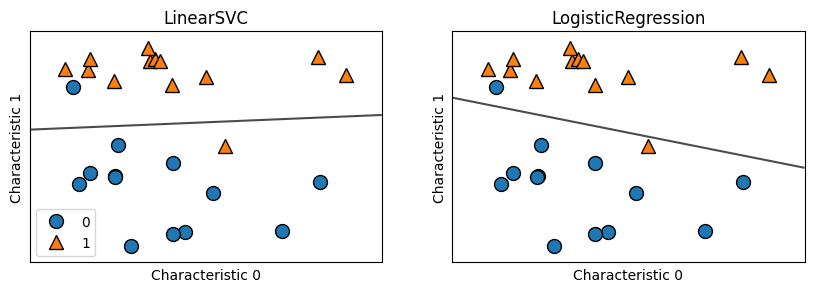

In [42]:
# forge 데이터셋을 사용하여 LogisticRegression과 LinearSVC 모델을 만들고 이 선형 모델들이 만들어낸 결정 경계를 시각화
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("Characteristic 0")
  ax.set_ylabel("Characteristic 1")
axes[0].legend();

- 위 그림은 이전처럼 forge 데이터셋의 첫 번째 특성을 X축에 놓고 두 번째 특성을 y축에 놓았음
- LinearSVC와 LogisticRegression으로 만든 결정 경계가 직선으로 표현되었고. 직선 위쪽에 놓이면 클래스 1로 분류될 것이고, 직선 아래쪽에 놓이면 클래스 0으로 분류될 것(위쪽은 클래스 1, 아래쪽은 클래스 0으로 나뉨)
- 두 모델은 비슷한 결정 경계를 만들었고, 똑같이 포인트 두 개를 잘못 분류
- LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C. C의 값이 높아지면 규제가 감소
- 매개변수로 높은 C 값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려 하고, 반면 C값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만듦
- 매개변수 C의 작동 방식을 다르게 설명하면, 알고리즘은 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확하게 분류하려고 노력할 것

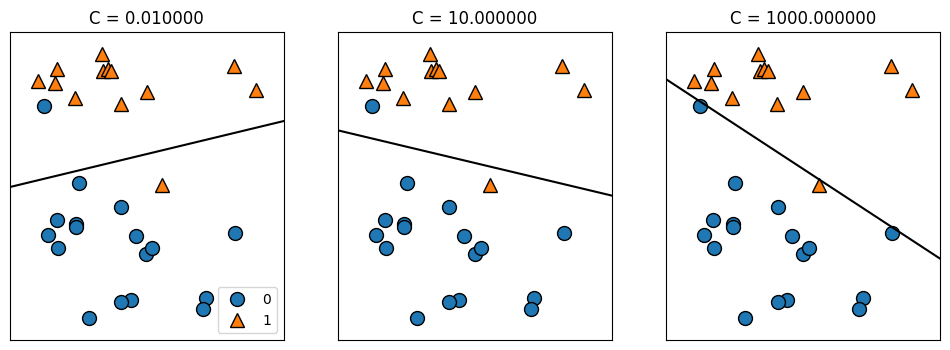

In [43]:
# LinearSVC를 사용한 예
mglearn.plots.plot_linear_svc_regularization()

- 왼쪽 그림은 아주 작은 C 값 때문에 규제가 많이 적용. 클래스 0의 대부분은 아래에 있고, 클래스 1의 대부분은 위에 있음. 규제가 강한 모델은 비교적 수평에 가까운 결정경계를 만들었고 잘못 분류한 데이터 포인트는 2개
- 중간 그림은 C 값이 조금 더 크며 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어짐
- 오른쪽 그림은 C 값을 아주 크게 하였더니 결정 경계는 더 기울었고 마침내 클래스 0의 모든 데이터 포인트를 올바로 분류. 모든 데이터 포인트를 정확하게 분류하려고 노력했으나, 클래스의 전체적인 배치를 잘 파악하지 못해 과대 적합된 것으로 판단
- 회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적인 것으보 보임
- 하지만 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 특성이 많아지면 과대적합되지 않도록 하는 것이 매우 중요해짐

In [44]:
# 유방암 데이터셋을 사용해서 LogisticRegression을 좀 더 자세히 분석
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("Train Set Score : {:.3f}".format(logreg.score(X_train, y_train)))
print("Test Set Score : {:.3f}".format(logreg.score(X_test, y_test)))

Train Set Score : 0.958
Test Set Score : 0.958


- 기본값 C=1이 훈련 세트와 테스트 세트 양쪽에 95% 정확도로 훌륭한 성능을 내고 있음
- 하지만 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합으로 판단

In [45]:
# 모델의 제약을 더 풀어주기 위해 C를 중가시킴
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("Train Set Score : {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test Set Score : {:.3f}".format(logreg100.score(X_test, y_test)))

Train Set Score : 0.981
Test Set Score : 0.965


- C=100을 사용하니 훈련 세트의 정확도가 높아졌고, 테스트 세트의 정확도도 조금 증가
- 복잡도가 높은 모델일수록 성능이 좋음을 뜻함

In [46]:
# 규제를 더 강하게 하기 위해 기본값(C=1)이 아닌 C=0.01을 사용
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("Train Set Score : {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test Set Score : {:.3f}".format(logreg001.score(X_test, y_test)))

Train Set Score : 0.953
Test Set Score : 0.951


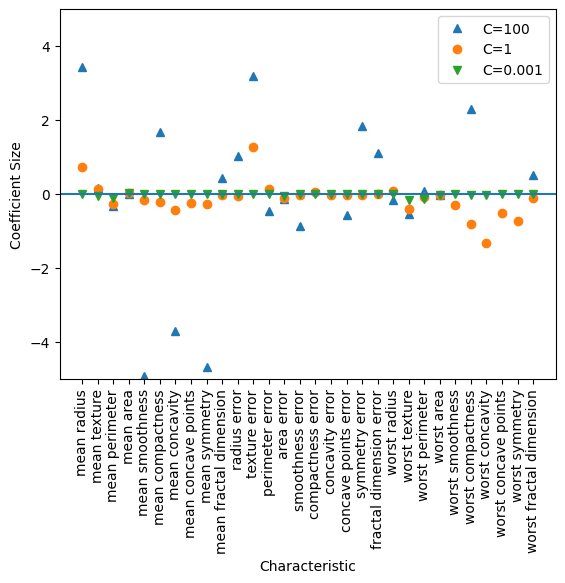

In [47]:
# 규제 매개변수 C 설정을 세 가지로 다르게 하여 학습시킨 모델의 계수 확인
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Characteristic")
plt.ylabel("Coefficient Size")
plt.legend();

- LogisticRegression은 기본으로 L2 규제를 적용하므로 Ridge로 만든 모습과 유사
- 규제를 강하게 할수록 계수들을 0에 더 가깝게 만들지만 완전히 0이 되지는 않음

C=0.001, Training Accuracy of l1 Logistic Regression : 0.91
C=0.001, Test Accuracy of l1 Logistic Regression : 0.92
C=1.000, Training Accuracy of l1 Logistic Regression : 0.96
C=1.000, Test Accuracy of l1 Logistic Regression : 0.96
C=100.000, Training Accuracy of l1 Logistic Regression : 0.99
C=100.000, Test Accuracy of l1 Logistic Regression : 0.98


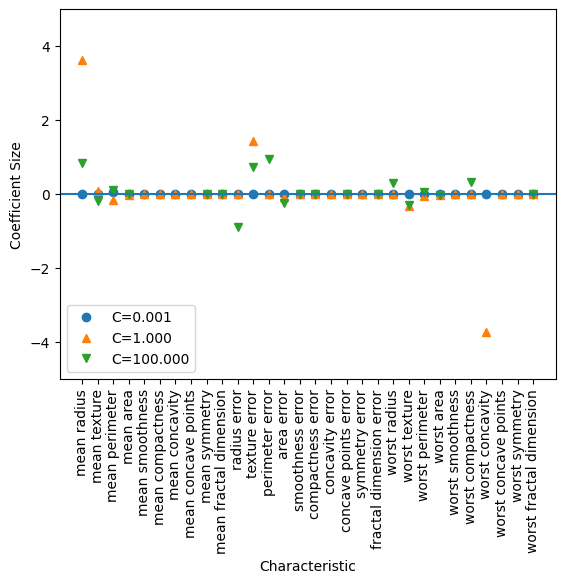

In [48]:
# 더 이해하기 쉬운 모델( 모델의 몇 개의 특성만을 사용)을 원한다면 L1 규제를 사용하는 것이 좋음
# 다음은 L1 규제를 사용할 때의 분류 정확도와 계수 그래프
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
  print("C={:.3f}, Training Accuracy of l1 Logistic Regression : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
  print("C={:.3f}, Test Accuracy of l1 Logistic Regression : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Characteristic")
plt.ylabel("Coefficient Size")
plt.ylim(-5, 5)
plt.legend(loc=3);

### 다중 클래스 분류용 선형 모델
- (로지스틱스 회귀를 제외한) 많은 선형 분류 모델은 태생적으로 이진 분류만을 지원
- 이전 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다(one -vs. -rest) 방법
- 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시키므로, 결국 클래스의 수 만큼 이진 분류 모델이 만들어짐
- 예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택
- 다중 클래스 로지스틱 회귀 이면의 수학은 일대다 방식과는 조금 다르지만 여기서도 클래스마다 하나의 계수 벡터와 절편을 만들며, 예측 방법도 같음

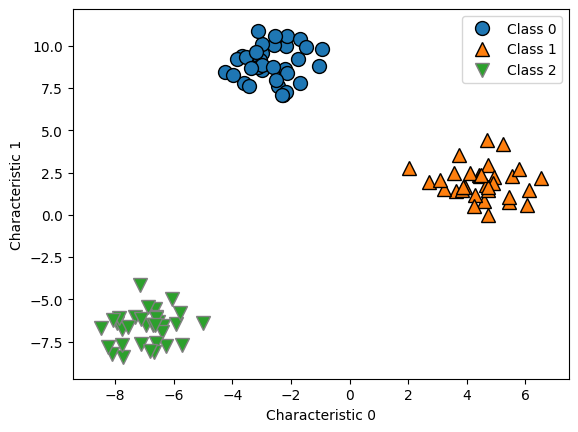

In [49]:
# 세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식을 적용
# 이 데이터셋은 2차원이며 각 클래스의 데이터는 정규분포를 따름
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1")
plt.legend(["Class 0", "Class 1", "Class 2"]);

In [50]:
# 이 데이터셋으로 LinearSVC 분류기를 훈련
linear_svm = LinearSVC().fit(X, y)
print("Size of Coefficient Array : ", linear_svm.coef_.shape)
print("Size of Intercept Array : ", linear_svm.intercept_.shape)

Size of Coefficient Array :  (3, 2)
Size of Intercept Array :  (3,)


c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


- coef_ 배열의 크기는 (3, 2). coef_의 행은 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며, 열은 각 특성에 따른 계수 값(이 데이터셋에서는 두 개)를 가지고 있음
- intercept_는 각 클래스의 절편을 담은 1차원 벡터

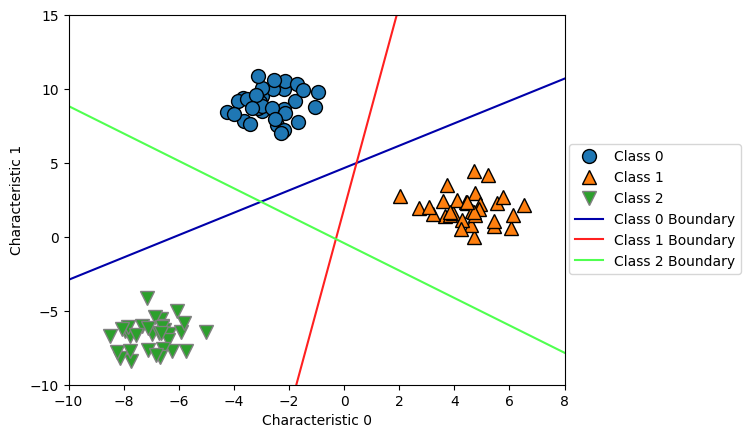

In [51]:
# 세 개의 이진 분류기가 만드는 경계를 시각화
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 Boundary", "Class 1 Boundary", "Class 2 Boundary"], loc=(1.01, 0.3));

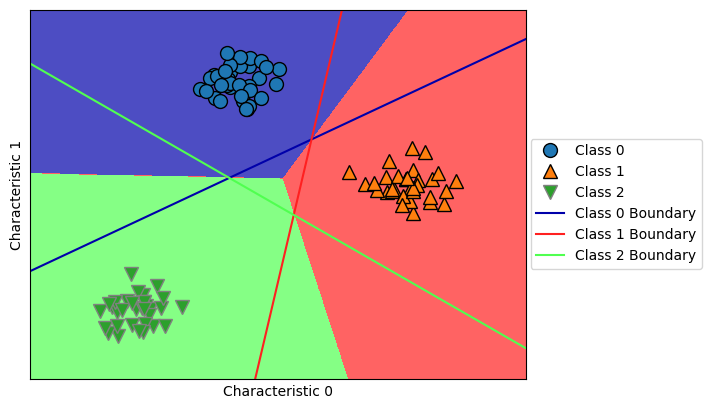

In [52]:
# 다음 예는 2차원 평면의 모든 포인트에 대한 예측 결과를 보여줌
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 Boundary", "Class 1 Boundary", "Class 2 Boundary"], loc=(1.01, 0.3))
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1");

### 장단점과 매개변수
- 선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 Logistic Regression에서는 C
- alpha 값이 클수록, C 값이 작을수록 모델이 단순해짐
- 보통 C와 alpha는 로그 스케일로 최적치를 정함
- 중요한 특성이 많지 않다고 생각하면 L1 규제를 사용하고, 그렇지 않으면 기본적으로 L2 규제를 사용
- L1 규제는 모델의 해석이 중요한 요소일 때도 사용할 수 있음
- L1 규제는 몇 가지 특성만 사용하므로 해당 모델에 중요한 특성이 무엇이고 그 효과가 어느 정도인지 설명하기 용이
- 선형 모델은 학습 속도와 예측이 빠름. 앞서 회귀와 분류에서 본 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있음
- 하지만 계수의 값들이 왜 그런지 명확하지 않을 때가 종종있음. 특히 데이터셋의 특성들이 서로 깊게 연관되어 있을 때, 이 경우에는 계수를 분석하기가 매우 어려움
- 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동. 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용
- 그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋음

In [53]:
# 메서드 연결. 모든 scikit-learn의 fit 메서드는 self를 반환
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행
logreg = LogisticRegression().fit(X_train, y_train)
# scikit-learn에서는 fit과 predict를 한 줄에 쓰는 메서드 연결도 자주 사용
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)
# 모델의 객체를 만들고, 훈련하고, 예측하는 일을 모두 한 줄에 쓸 수 있음
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
# 한 줄에 너무 많은 메서드가 들어가면 코드를 읽기 어려워짐. 더군다나 학습된 로지스틱 회귀 모델을 변수에 할당되지 않아 (예측 결과를 담은 변수만 남음) 다른 데이터에 대해 예측하거나 만들어진 모델을 분석할 수 없음

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

- SGDClassifier와 SGDRegressor는 확률적 경사 하강법(Stochastic Gradient Descent)을 사용하여 다양항 선형 모델을 훈련
- loss 매개변수에 최적화할 손실 함수를 지정
- SGDClassifier의 loss 기본값은 힌지 손실인 'hinge'이며 서포트 벡터 머신 모델을 훈련
- 앞서 사용했던 간단한 다중 분류 데이터셋에 SGDClassifier를 훈련. 훈련 결과를 항상 동일하게 만들기 위해 random_state를 고정

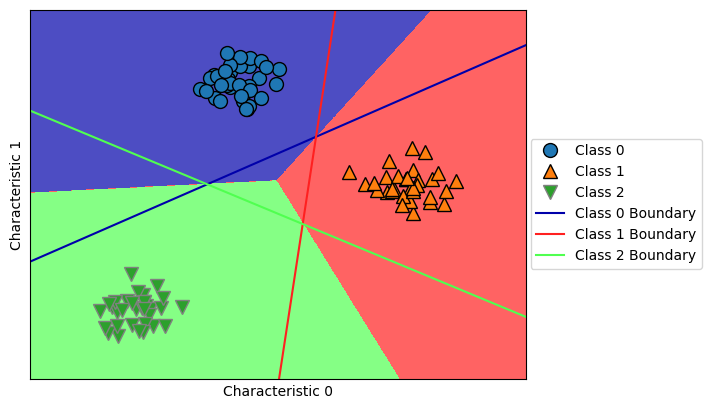

In [54]:
from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive', eta0=0.1, random_state=42, n_jobs=1)
sgd_c.fit(X, y)
mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(sgd_c.coef_, sgd_c.intercept_, mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0", "Class 1", "Class 2", "Class 0 Boundary", "Class 1 Boundary", "Class 2 Boundary"], loc=(1.01, 0.3))
plt.xlabel("Characteristic 0")
plt.ylabel("Characteristic 1")
plt.show();

In [55]:
# 확장된 보스턴 데이터셋에 SGDRegressor 모델을 훈련
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)

print("Train Set Score : {:.2f}".format(sgd_r.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(sgd_r.score(X_test, y_test)))

Train Set Score : 0.91
Test Set Score : 0.77


## 3-4. 나이브 베이즈 분류기 (Naive Bayes)
- 선형 모델과 유사. LogisticRegression이나 LinearSVC 같은 선형 분류기보다 훈련 속도가 빠른 편이지만, 그 대신 일반화 성능이 조금 떨어짐
- 나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합
- scikit-learn에 구현된 나이브 베이즈 분류기는 GaussianNB, BernoulliNB, MultinomialNB 이렇게 세 가지
- GaussianNB : 연속적인 어떤 데이터에도 적용할 수 있음
- BernoulliNB : 이진 데이터에 적용가능
- MultinomialNB : 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트로, 예를 들면 문장에 나타난 단어의 획수)

In [56]:
# BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셈
X = np.array([[0, 1, 0, 1],
             [1, 0, 1, 1],
             [0, 0, 0, 1],
             [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [57]:
counts = {}
for label in np.unique(y):
  # 각 클래스에 대해 반복
  # 특성마다 1이 나타난 횟수를 셈
  counts[label] = X[y == label].sum(axis=0)
  print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2])}
특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### 장단점과 매개변수
- MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있음
- alpha가 크면 더 완만해지고 모델의 복잡도는 낮아짐. alpha에 따른 알고리즘 성능 변동은 비교적 크지 않아서, alpha 값이 성능 향상에 크게 기여하지 않지만, 이 값을 조정하면 어느 정도는 정확도를 높일 수 있음
- GaussianNB는 대부분 매우 고차원인 데이터셋에 사용하고, 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용
- MultinomialNB는 보통 0이 아닌 특성이 비교적 많은 데이터셋(예를 들어 큰 문서들)에서 BernoulliNB보다 성능이 높음
- 나이브 베이즈 모델과 선형 모델의 장단점은 유사. 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉬움
- 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않음
- 선형 모델로는 학습 시간이 너무 오래 걸리는 매우 큰 데이터셋에는 나이브 베이즈 모델을 시도해볼 만하며 종종 사용됨

## 3-5. 결정트리 (Decision Tree)
- 결정트리는 분류와 회귀 문제에 널리 사용하는 모델
- 기본적으로 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습

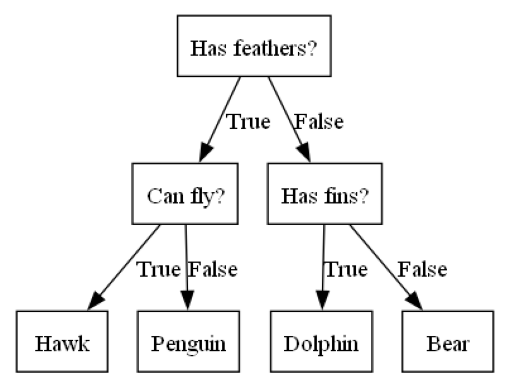

In [58]:
# 연속된 질문들을 결정 트리로 나타낼 수 있음
mglearn.plots.plot_animal_tree();

### 결정 트리 만들기
- 결정 트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 뜻
- 머신러닝에서는 이런 질문들을 테스트라고 함
- 보통 데이터는 앞서의 동물 구분 예제에서처럼 예/아니오 형태의 특성으로 구성되지 않고, 2차원 데이터셋과 같이 연속된 특성으로 구성
- 연속적인 데이터에 적용할 테스트는 '특성 i는 값 a보다 큰가?'와 같은 형태
- 트리를 만들 때 알고리즘은 가능한 모든 테스트에서 타깃 값에 대해 가장 많은 정보를 가진 것을 선택

### 결정 트리의 복잡도 제어
- 일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합
- 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 의미
- 즉 훈련 세트의 모든 데이터 포인트는 정확한 클래스의 리프 노드에 있음
- 과대적합을 막는 전략은 1) 사전 가지치기(pre-pruning) : 트리 생성을 일찍 중단하는 전략 2) 사후 가지치기 혹은 가지치기(post-pruning pruning) : 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략
- 사전 가지치기 방법은 트리의 최대 깊이나 리프의 최대 갯수를 제한하거나, 또는 노드가 분할하기 위한 포인트의 최소 갯수를 지정
- scikit-learn에서 결정 트리는 DecisionTreeRegressor와 DecisionTreeClassifier에 구현되어 있음. scikit-learn은 사전 가지치기만 지원

In [59]:
# random_state 옵션을 고정해 만들어진 트리를 같은 조건으로 비교
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Training Set Accuracy : {:.3f}".format(tree.score(X_train, y_train)))
print("Test Set Accuracy : {:.3f}".format(tree.score(X_test, y_test)))

Training Set Accuracy : 1.000
Test Set Accuracy : 0.937


- 기대한 대로 모든 리프 노드가 순수 노드이므로 훈련 세트의 정확도는 100%
- 즉 트리는 훈련 데이터의 모든 레이블을 완벽하게 기억할 만큼 충분히 길게 만들어졌음
- 테스트 세트의 정확도는 이전에 본 선형 모델에서의 정확도인 95%보다 조금 낮음
- 결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수 있음
- 그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않음

In [60]:
# 사전 가지치기를 트리에 적용해서 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막음
# 한 가지 방법은 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것
# max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한
# 트리 깊이를 제한하면 과대적합이 줄어듦. 이는 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선시킴
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Training Set Accuracy : {:.3f}".format(tree.score(X_train, y_train)))
print("Test Set Accuracy : {:.3f}".format(tree.score(X_test, y_test)))

Training Set Accuracy : 0.988
Test Set Accuracy : 0.951


### 결정 트리 분석
- 이 함수는 그래프 저장용 텍스트 파일 포맷인 .dot파일을 생성
- 각 노드에서 다수인 클래스를 색으로 나타내기 위해 옵션을 주고 적절히 레이블되도록 클래스 이름과 특성 이름을 매개변수로 전달

In [61]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Negative", "Positive"], feature_names=cancer.feature_names, impurity=False, filled=True)

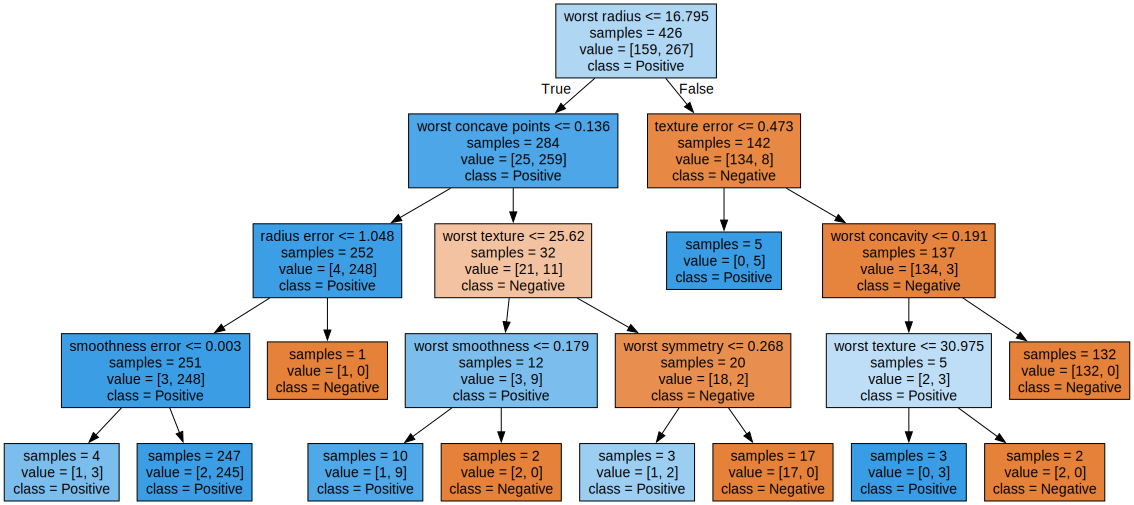

In [62]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 트리를 시각화하면 알고리즘의 예측이 어떻게 이뤄지는지 잘 이해할 수 있으며 비전문가에게 머신러닝 알고리즘을 설명하기에 좋음
- 깊이가 4만 되어도 트리는 매우 장황해짐. 트리가 더 깊어지면(10 정도의 깊이가 보통) 한눈에 보기 힘듦
- 트리를 조사할 때는 많은 수의 데이터가 흐르는 경로를 찾아보면 좋음
- 각 노드에 적힌 samples는 각 노드에 있는 샘플의 수를 나타내며 value는 클래스당 샘플의 수를 제공

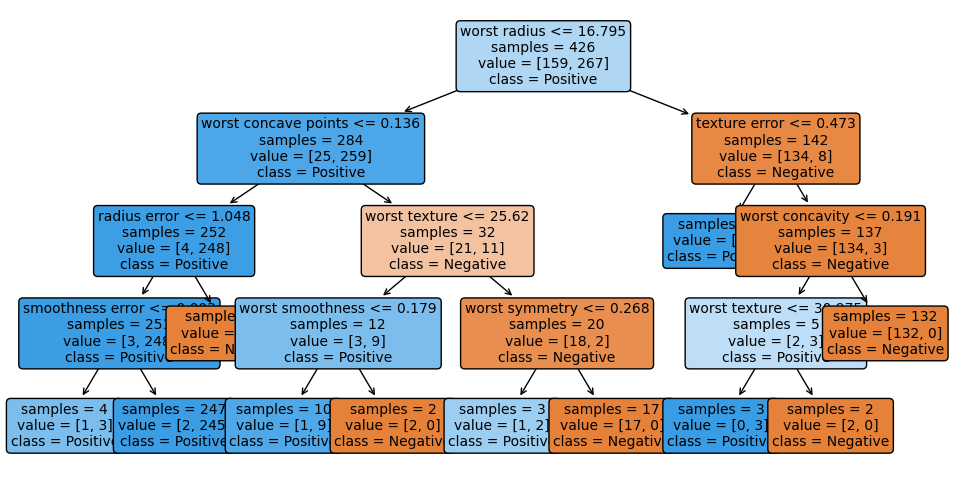

In [63]:
# plot_tree() 함수를 사용하면 .dot 파일을 만들지 않고 바로 트리를 그릴 수 있음
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 6))
plot_tree(tree, class_names=["Negative", "Positive"], feature_names=cancer.feature_names, impurity=False, filled=True, rounded=True, fontsize=10)
plt.show();

### 트리의 특성 중요도
- 가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도(Feature Importance)
- 값은 0과 1 사이의 숫자로, 특성 중요도의 전체 합은 1, 각 특성에 대해 0은 전혀 사용되지 않았고, 1은 완벽하게 타깃 클래스를 예측했다는 것

In [64]:
print("Feature Importance:\n", tree.feature_importances_)

Feature Importance:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


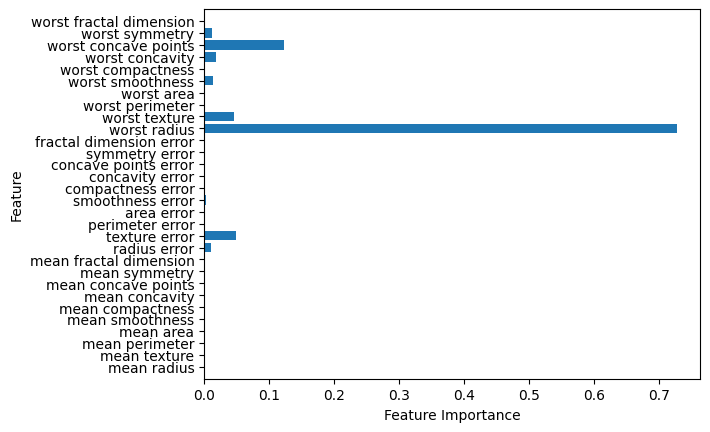

In [65]:
# 선형 모델의 계수를 시각화하는 것과 비슷한 방법으로 특성 중요도도 시각화할 수 있음
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature Importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

- 첫 번째 노드에서 사용한 특성("worst radius")이 가장 중요한 특성으로 나타남. 이 그래프는 첫 번째 노드에서 두 클래스를 잘 나누고 있다는 관찰을 뒷받침
- 그러나 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아님. 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있음
- 선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없음

Feature importances: [0. 1.]


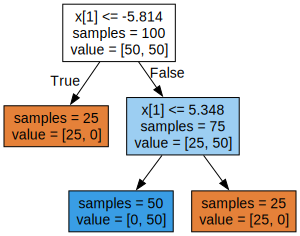

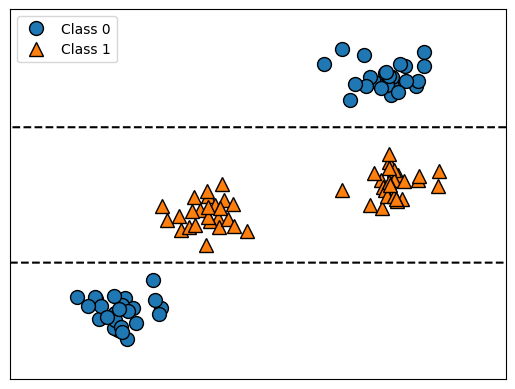

In [66]:
mglearn.plots.plot_tree_not_monotone()

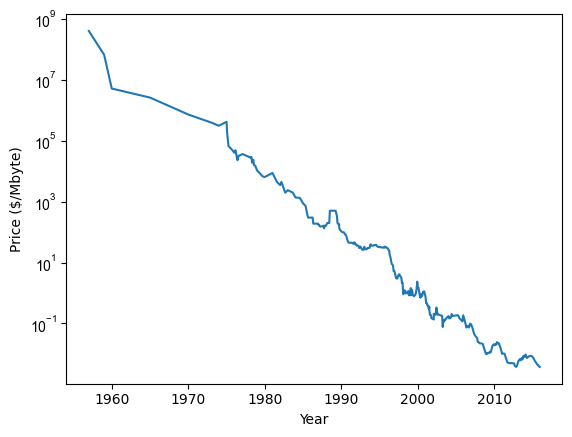

In [67]:
# 컴퓨터 메모리 가격 동향 데이터셋. x축은 날짜, y축은 해당 년도의 램(RAM) 1메가바이트 당 가격
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)");

In [68]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듦
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date.to_numpy()[:, np.newaxis]

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿈
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date.to_numpy()[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌림
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

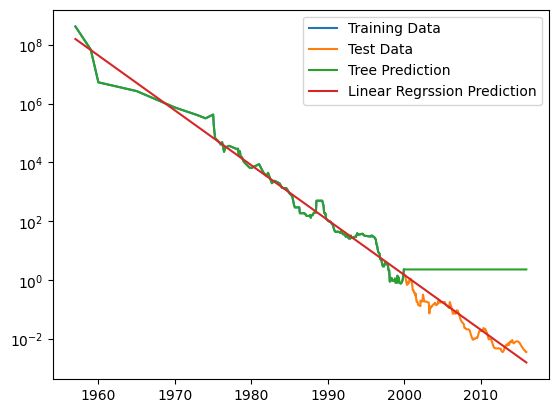

In [69]:
plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regrssion Prediction")
plt.legend();

### 장단점과 매개변수
- 결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수
- 보통은 사전 가지치기 방법 중 max_depth, max_leaf_nodes 또는 min_samples_leaf 중 하나만 지정해도 과대적합을 막는 데 충분
- 결정 트리의 장점 : 1) 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해가 쉬움(비교적 작은 트리인 경우) 2) 데이터의 스케일에 구애받지 않음. 각 특성이 개별적으로 처리되어 데이터를 분할하는 데 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요 없음. 특히 특성의 스케일이 서로 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동
- 결정 트리의 단점 : 사전 가지치기를 사용함에도 불구하고 과대적합되는 경향이 있어 일반화 성능이 좋지 않다는 것. 그래서 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용

In [70]:
# 램 가격 데이터셋의 데이터프레임을 사용해 DecisionTreeRegressor를 훈련하고 입력된 특성 개수와 데이터프레임의 열 이름을 출력
tree.fit(data_train[['date']], y_train)
print("Characteristic Number : ", tree.n_features_in_)
print("Characteristic Title : ", tree.feature_names_in_)

Characteristic Number :  1
Characteristic Title :  ['date']


## 3.6. 결정 트리의 앙상블 (Ensemble)
- 앙상블은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
- 랜덤 포레스트 (Random Forest)
- 그레이디언트 부스팅 (Gradient Boosting)

### 랜덤 포레스트 (Random Forest)
- 결정 트리의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것. 랜덤 포레스트는 이 문제를 회피할 수 있는 방법
- 랜덤 포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음
- 랜덤 포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는 데 기초
- 예를 들어 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있음
- 이를 위해 결정 트리를 많이 만들어야 하고, 각각의 트리는 타깃 예측을 잘 해야하고 다른 트리와는 구별되어야 함
- 랜덤 포레스트는 트리들이 달라지도록 트리 생성 시 무작위성을 주입
- 랜덤 포레스트에서 트리를 랜덤하게 만드는 방법 : 1) 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택하는 방법 2) 분할 테스트에서 특성을 무작위로 선택하는 방법

### 랜덤 포레스트 구축
- 랜덤 포레스트 모델을 만들기위해 생성할 트리의 갯수를 정해야 함(RandomForestRegressor나 RandomForestClassifier의 n_estimators 매개변수)
- 트리들은 완전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작위한 선택을 함
- 트리를 만들기 위해 먼저 데이터의 부트스트랩 샘플(Bootstrap Sample)을 생성
- 다시 말해 n_samples개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출
- 이렇게 만든 데이터셋으로 결정 트리를 만듦
- 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아닌 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾음
- 몇 개의 특성을 고를지를 max_features 매개변수로 조정할 수 있음
- 부트스트랩 샘플링은 랜덤 포레스트의 트리가 조금씩 다른 데이터셋을 이용해 만들어지도록 함
- 핵심 매개변수는 max_features. max_features를 n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않음(부트스트랩 샘플링으로 인한 무작위성은 그래도임)
- max_features=1로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 됨
- max_features 값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰질 것
- max_features를 낮추면 랜덤 포레스트 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 됨
- 랜덤 포레스트로 예측을 할 때는 먼저 알고리즘이 모델에 있는 모든 트리의 예측을 만듦
- 회귀의 경우에는 이 예측들을 평균하여 최종 예측을 만듦
- 분류의 경우는 약한 투표 전략을 사용
- 즉 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측을 함
- 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 됨

In [71]:
# 랜덤 포레스트 분석
# 앞서 사용한 two_moon 데이터셋을 가지고 트리 5개로 구성된 랜덤 포레스트 모델을 만들어봄
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

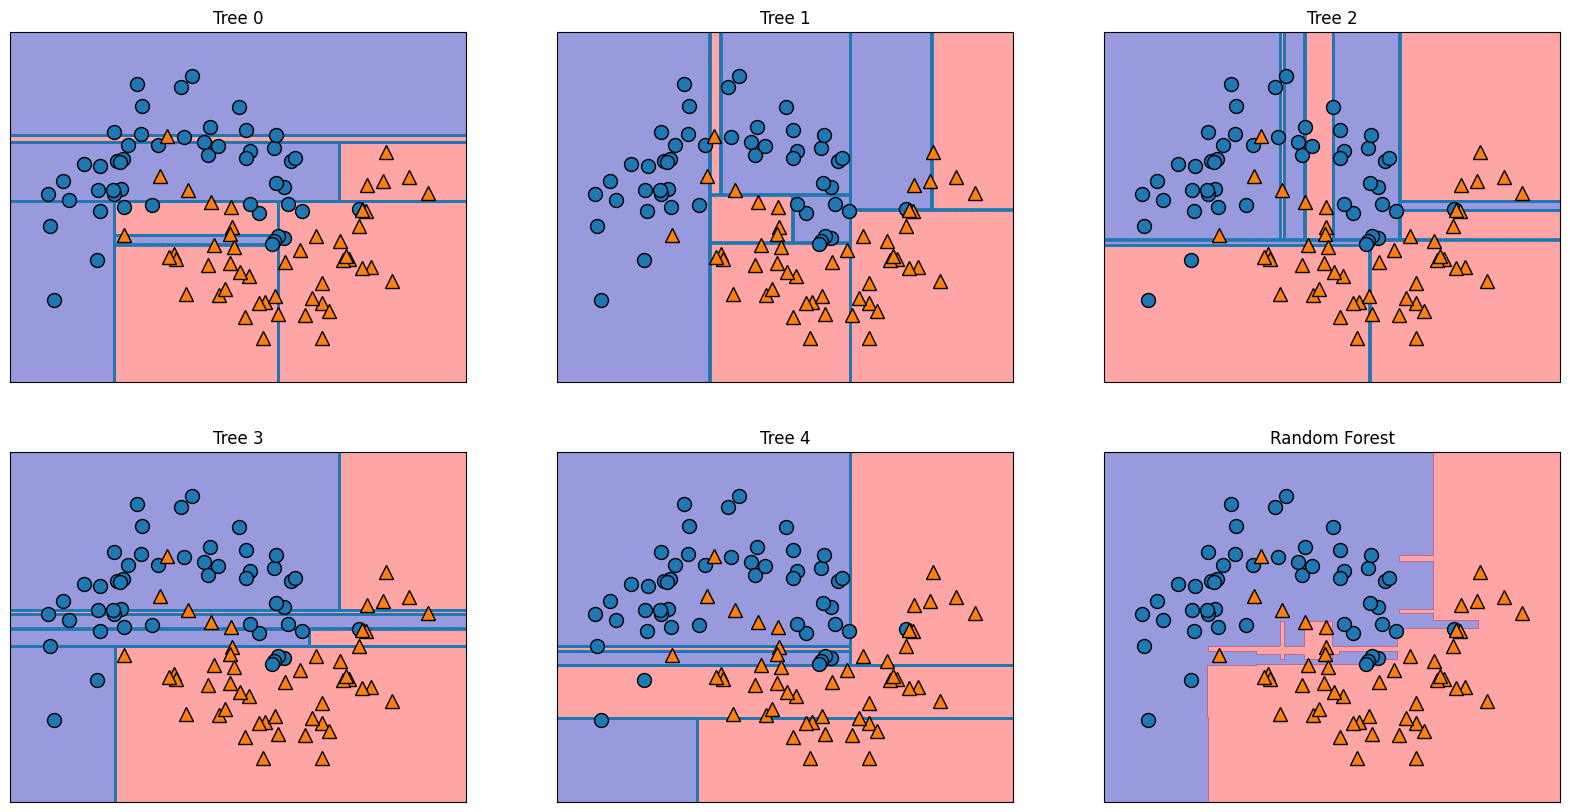

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y);

- 부트스트랩 샘플링 때문에 한쪽 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어 각 트리는 불완전
- 랜덤 포레스트는 개개의 트리보다는 덜 과대적합되고 훨씬 좋은 결정 경계를 만들어 줌
- 실제 애플리케이션에서는 수 백에서 수 천에 이르는 매우 많은 트리를 사용하기 때문에 더 부드러운 결정경계가 만들어짐

In [73]:
# 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트를 적용
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Training Set Accuracy : {:.3f}".format(forest.score(X_train, y_train)))
print("Test Set Accuracy : {:.3f}".format(forest.score(X_test, y_test)))

Training Set Accuracy : 1.000
Test Set Accuracy : 0.972


- 랜덤 포레스트는 기본 설정으로도 좋은 결과를 만들어줄 때가 많음
- 결정 트리처럼 랜덤 포레스트도 특성 중요도를 제공하는데 각 트리의 특성 중요도를 취합하여 계산한 것
- 일반적으로 랜덤 포레스트에서 제공하는 특성 중요도가 하나의 트리세어 제공하는 것보다 더 신뢰할 만함

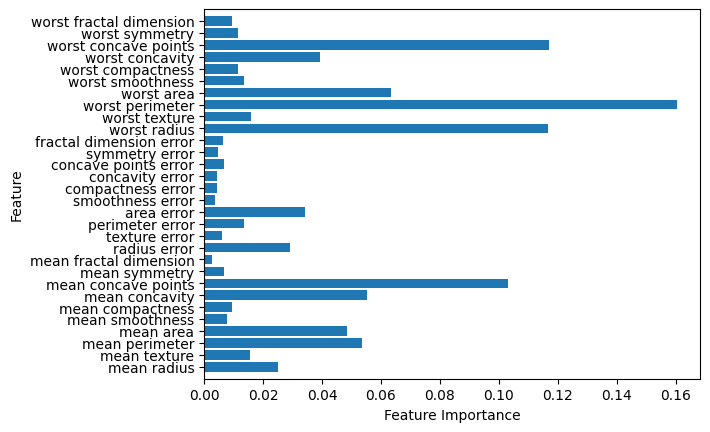

In [74]:
plot_feature_importances_cancer(forest)

- 랜덤 포레스트에서는 단일 트리의 경우보다 훨씬 많은 특성이 0 이상의 중요도 값을 갖음
- 랜덤 포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려할 수 있도록 하므로, 그 결과 랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있음

### 장단점과 매개변수
- 회귀와 분류에 있어 랜덤 포레스트는 현재 가장 널리 상용되는 머신러닝 알고리즘
- 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없음
- 기본적으로 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있음
- 수십, 수백 개의 트리를 자세히 분석하기 어렵고 랜덤 포레스트의 트리는 (특성의 일부만 사용하므로) 결정 트리보다 더 깊어지는 경향도 있기 때문에, 의사 결정 과정을 간소하게 표현할때는 단일 트리를 사용
- 그러므로 비전문가에게 예측 과정을 시각적으로 보여주기 위해서는 하나의 결정 트리가 더 좋은 선택이 될 수 있음
- 랜덤 포레스트의 트리가 많을수록 random_state 값의 변화에 따른 변동이 적음. random_state의 지정 혹은 고정에 따라 같은 모델이나 전혀 다른 모델이 만들어짐
- 랜덤 포레스트는 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않으므로, 이런 데이터에는 선형 모델이 더 적합
- 속도와 메모리 사용에 제약이 있는 애플리케이션이라면 선형 모델이 적합
- 중요 매개변수는 n_estimators, max_features이고 max_depth같은 사전 가지치기 옵션이 있음
- n_estimators는 클수록 좋음
- 더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델을 만들 수 있음
- 하지만 더 많은 트리는 더 많은 메모리와 긴 훈련 시간으로 이어짐
- max_features는 각 트리가 얼마나 무작위가 될지를 결정하며 작은 max_features는 과대 적합을 줄여줌. 일반적으로 기본값을 쓰는 것이 좋은 방법

### 그레이디언트 부스팅 (Gradient Boosting) 회귀 트리
- 그레이디언트 부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또다른 앙상블 방법
- 이름이 회귀지만 이 모델은 회귀와 분류 모두에 사용할 수 있음
- 랜덤 포레스트와는 달리 그레이디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦
- 기본적으로 그레이디언트 부스팅 회귀 트리에는 무작위성은 없으나, 대신 강력한 사전 가지치기가 사용됨
- 그레이디언트 부스팅은 보통 1~5 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠름
- 그레이디언트 부스팅의 근본 아이디어는 이런 얕은 트리 같은 간단한 모델을 많이 연결하는 것. 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될수록 성능이 좋아짐
- 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 넓은 정확도를 제공
- 그레이디언트 부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 learning_rate
- 학습률이 크면 보정을 강하게 하기 때문에 복잡한 모델을 만듦
- n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 많아짐

In [75]:
# 유방암 데이터셋을 이용해 GradientBoostingClassifier를 사용한 예. 기본값인 깊이가 3인 트리 100개와 학습률 0.1을 사용
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Training Set Accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Set Accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Training Set Accuracy : 1.000
Test Set Accuracy : 0.965


In [76]:
# 훈련 세트의 정확도가 100%이므로 과대적합된 것으로 보임
# 과대적합을 막기 위해서 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있음
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Training Set Accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Set Accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Training Set Accuracy : 0.991
Test Set Accuracy : 0.972


In [77]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Training Set Accuracy : {:.3f}".format(gbrt.score(X_train, y_train)))
print("Test Set Accuracy : {:.3f}".format(gbrt.score(X_test, y_test)))

Training Set Accuracy : 0.988
Test Set Accuracy : 0.958


- 이상의 두 방식은 모델의 복잡도를 감소시키므로 예상대로 훈련 세트의 정확도가 낮아졌음
- 이 예에서 학습률을 낮추는 것은 테스트 세트의 성능을 조금밖에 개선하지 못했지만, 트리의 최대 깊이를 낮추는 것은 모델 성능 향상에 크게 기여했음
- 다른 결정 트리 기반 모델처럼 특성의 중요도를 시각화하면 모델을 더 잘 이해할 수 있음
- 트리를 100개나 사용했으므로 깊이가 1이더라도 모든 트리를 분석하기는 쉽지 않음

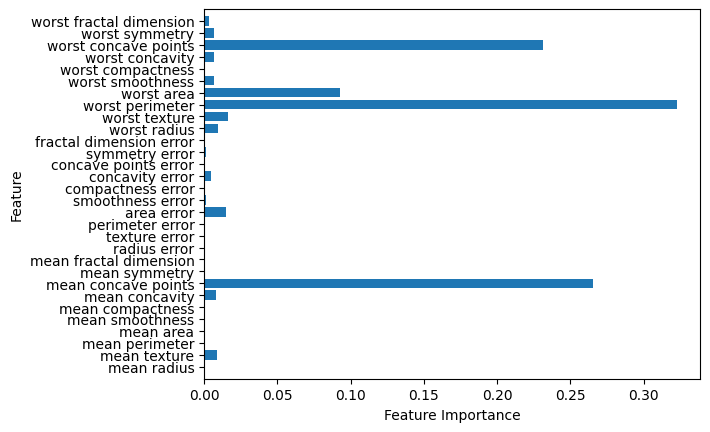

In [78]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

- 비슷한 종류의 데이터에서 그레이디언트 부스팅과 랜덤 포레스트 둘 다 잘 작동하지만, 보통 더 안정적인 랜덤 포레스트를 먼저 적용
- 랜덤 포레스트가 잘 작동하더라도 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할 때 그레이디언트 부스팅을 사용하면 도움이 됨
- 대규모 머신러닝 문제에 그레이디언트 부스팅을 적용하려면 xgboost 패키지와 파이썬 인터페이스를 검토

### 장단점과 매개변수
- 가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 것
- 다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 동작
- 트리 기반 모델의 특성상 희소한 고차원 데이터에서는 잘 작동하지 않음
- 그레이디언트 부스팅 트리 모델의 중요 매개변수는 트리의 개수를 지정하는 n_estimators와 이전 트리의 오차를 보정하는 정도를 조절하는 learning_rate이고, 이 두 매개변수는 매우 깊게 연관
- learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 함
- n_estimators가 클수록 좋은 랜덤 포레스트와는 달리 그레이디언트 부스팅에서 n_estimators를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아짐
- 따라서 일반적으로 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾아야 함
- 중요한 또 다른 매개변수는 각 트리의 복잡도를 낮추는 max_depth는 통상 그레이디언트 부스팅 모델에서는 max_depth를 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게 함

## 3.7. 그 외 다른 앙상블 (Other Ensembles)
- 배깅 (Bagging)
- 엑스트라 트리 (Extra Tree)
- 에이다부스트 (AdaBoost)
- 히스토그램 기반 그레이디언트 부스팅 (Histogram-based Gradient Boosting)

In [79]:
# two_moons 데이터셋과 cancer 데이터셋을 사용
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)

### 배깅 (Bagging)
- Bootstrap Aggregating의 줄임말
- 배깅은 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킴

In [80]:
# 배깅을 사용하여 cancer 데이터셋에 로지스틱 회귀 모델을 100개 훈련하여 앙상블
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

- LogisticRegression 객체를 기반 분류기로 전달하고 훈련할 분류기의 개수는 100개로 지정 (n_estimators의 기본값은 10)
- oob_score를 True로 지정하면 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가 (이 값을 OOB{Out of Bag} 오차라고 부름)
- oob_score 값을 통해 테스트 세트의 성능을 짐작할 수 있음
- RandomForestClassifier도 oob_score 매개변수를 지원. 두 모델 모두 이 매개변수의 기본값은 False

In [81]:
print("Training Set Accuracy : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("Test Set Accuracy : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB Sample Accuracy : {:.3f}".format(bagging.oob_score_))

Training Set Accuracy : 0.962
Test Set Accuracy : 0.958
OOB Sample Accuracy : 0.948


In [82]:
# 결정 트리로 배깅을 수행하는 것보다 랜덤 포레스트를 사용하는 것이 편리하지만 여기서는 직접 결정 트리에 배깅을 적용
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=5, n_jobs=-1,
                  random_state=42)

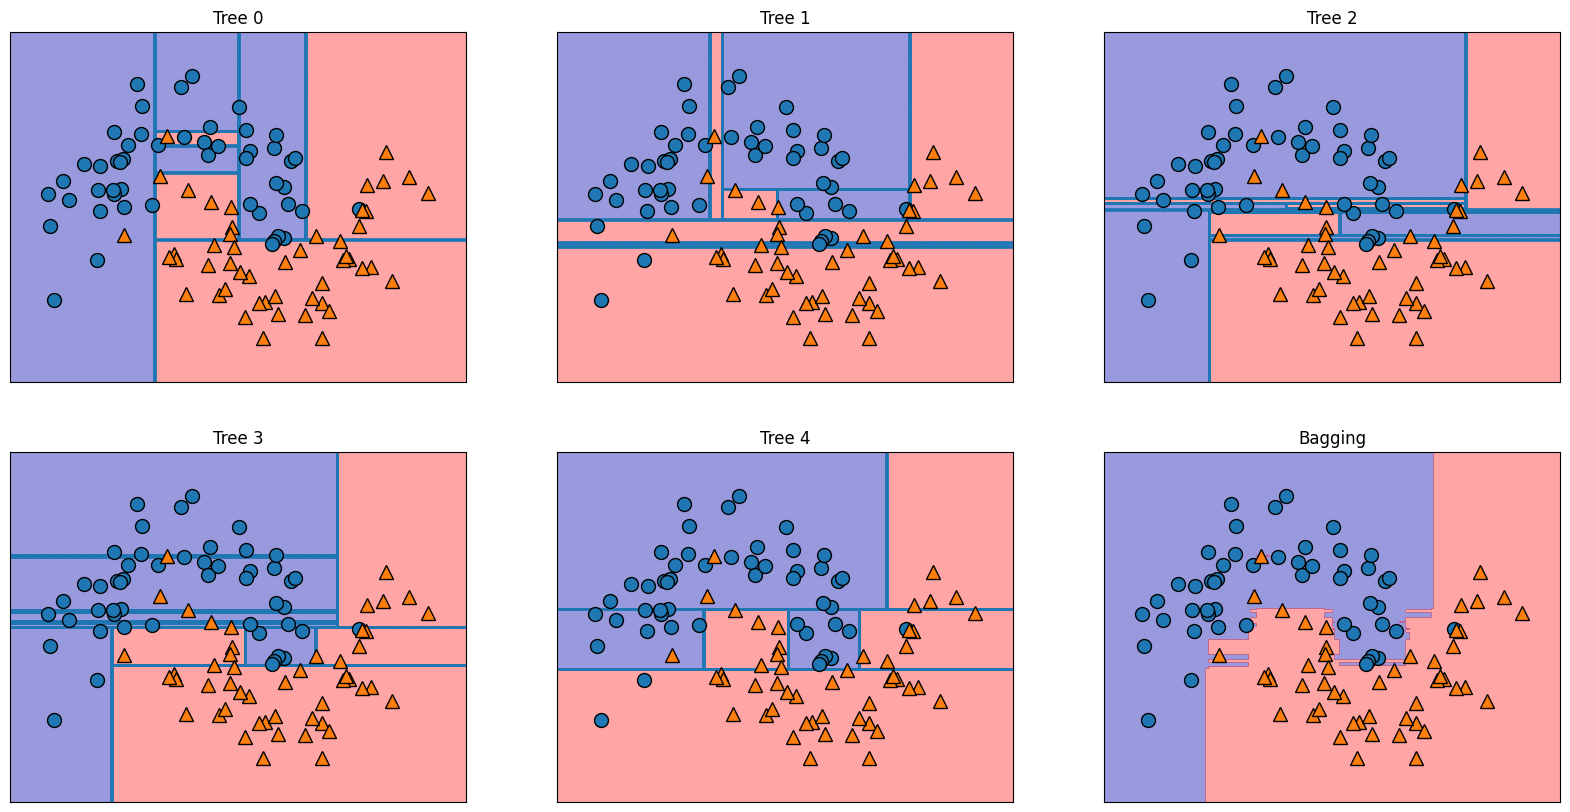

In [83]:
# 랜덤 포레스트에서처럼 이 배깅 분류기에 있는 결정 트리의 결정 경계를 시각화
# 결과 그래프는 랜덤 포레스트의 결정 경계와 매우 유사
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show();

In [84]:
# n_estimators=100으로 늘려서 cancer 데이터셋에 훈련시켜보고 훈련 세트와 테스트 세트의 성능을 확인
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print("Training Set Accuracy : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("Test Set Accuracy : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB Sample Accuracy : {:.3f}".format(bagging.oob_score_))

Training Set Accuracy : 1.000
Test Set Accuracy : 0.965
OOB Sample Accuracy : 0.948


- 배깅은 max_samples 매개변수에서 부트스트랩 샘플의 크기를 지정할 수 있음
- 기본값은 1.0으로 훈련 샘플 개수만큼 추출
- 이 매개변수에 원하는 샘플 갯수를 지정하거나 훈련 샘플 개수의 비율(0~1 사이 실수)을 지정할 수 있음
- bootstrap 매개변수(기본값 True) False로 지정하면 중복을 허용하지 않는 샘플링을 수행
- max_features 매개 변수에서 각 분류기 훈련에 사용할 특성 개수를 지정
- 랜덤 포레스트는 DecisionTreeClassifier(splitter='best')를 사용하도록 고정되어 있음
- 결정 트리를 splitter='random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾음

### 엑스트라 트리 (Extra Tree)
- 엑스트라 트리는 랜덤 포레스트와 비슷하지만 후보 특성을 무작위로 분할한 다음 최적의 분할을 찾음
- 랜덤 포레스트와 달리 DecisionTreeClassifier(splitter='random')을 사용하고 부트스트랩 샘플링은 기본적으로 적용하지 않음
- 예측 방식은 랜덤 포레스트와 동일하게 각 트리가 만든 확률값을 평균함

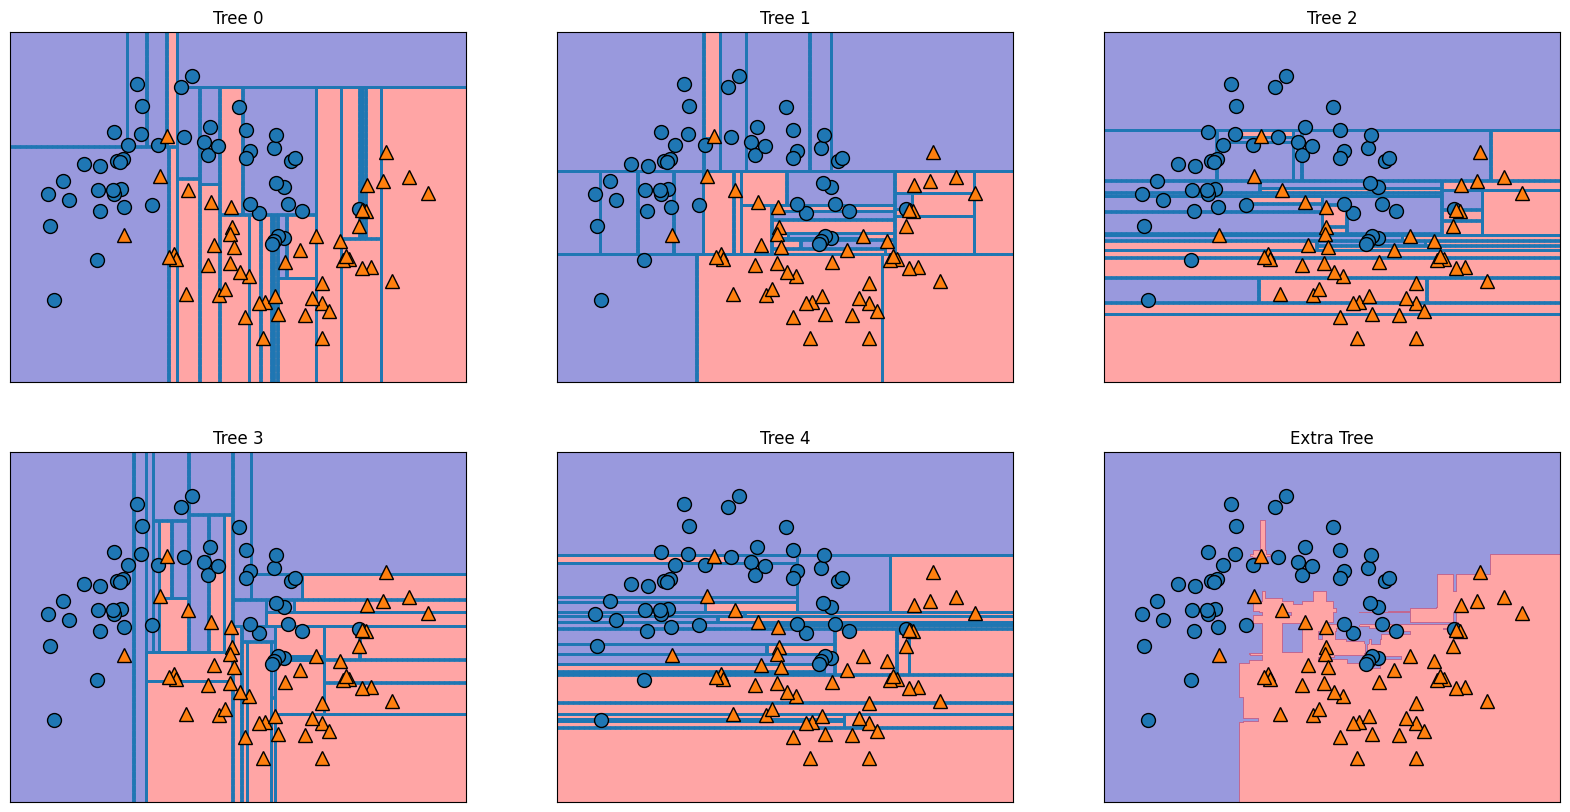

In [85]:
# two_moons 데이터셋에 엑스트라 트리를 적용하여 결정 경계를 확인
# 후보 노드를 랜덤하게 분할한 다음 최선의 분할을 찾기 때문에 개별 트리의 결정 경계가 더 복잡
# 개별 트리를 앙상블한 엑스트라 트리의 결정 경계는 비교적 안정적
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("Extra Tree")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show();

In [86]:
# ExtraTreesClassifier 트리 개수를 100으로 지정하여 cancer 데이터셋을 적용
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print("Training Set Accuracy : {:.3f}".format(xtree.score(Xc_train, yc_train)))
print("Test Set Accuracy : {:.3f}".format(xtree.score(Xc_test, yc_test)))

Training Set Accuracy : 1.000
Test Set Accuracy : 0.972


- 엑스트라 트리가 랜덤 포레스트보다 계산 비용이 비교적 적지만 무작위 분할 때문에 일반화 성능을 높이려면 종종 많은 트리를 만들어야 함
- 일반적으로 랜덤 포레스트가 더 선호되는 이유

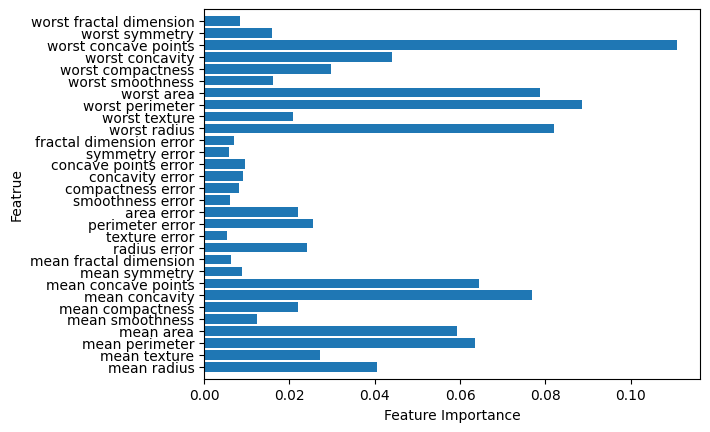

In [87]:
# 엑스트라 트리의 특성 중요도를 시각화. 엑스트라 트리의 특성 중요도는 비교적 랜덤 포레스트와 비슷
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Featrue")
plt.ylim(-1, n_features)
plt.show();

### 에이다부스트 (AdaBoost)
- Adaptive Boosting의 줄임말
- 에이다부스트는 글이디언트 부스팅처럼 약한 학습기를 사용
- 그레이디언트 부스팅과는 달리 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킴
- 훈련된 각 모델은 성능에 따라 가중치가 부여. 예측을 만들 때는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택
- scikit-learn의 AdaBoostClassifier는 기본값으로 DecisionTreeClassifier(max_depth=1)를 사용하고 AdaBoostRegressor는 DecisionTreeRegressor(max_depth=3)를 사용하지만 base_estimator 매개변수에서 다른 모델을 지정할 수도 있음

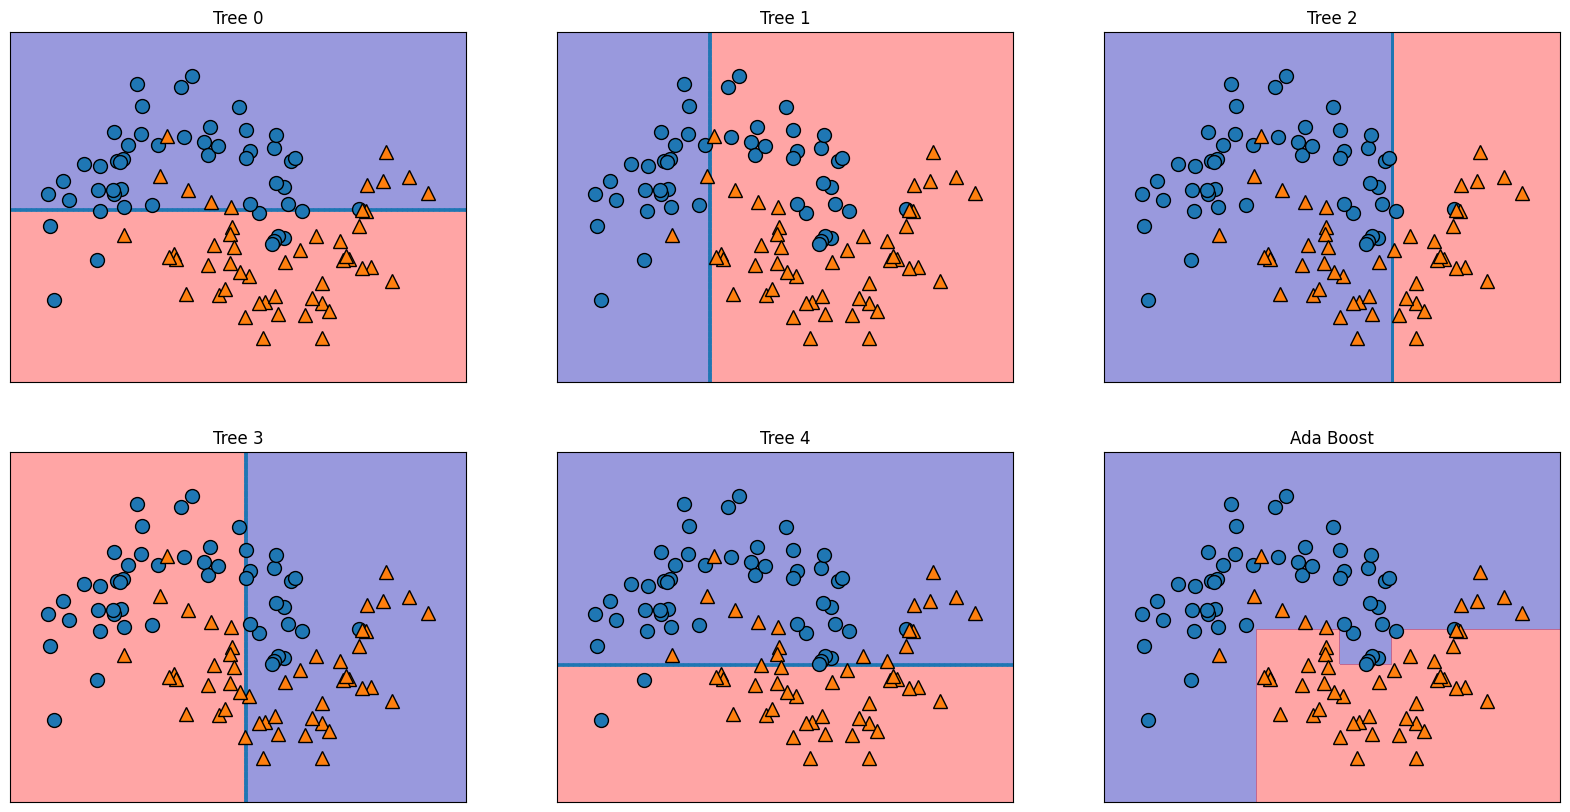

In [88]:
# two_moons 데이터셋에 적용하여 결정 경계를 그림
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("Ada Boost")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [89]:
# 앙상블된 결정 경계도 다른 앙상블 모델에 비해 좀 더 단순
# cancer 데이터셋에 적용
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)
print("Training Set Accuracy : {:.3f}".format(ada.score(Xc_train, yc_train)))
print("Test Set Accuracy : {:.3f}".format(ada.score(Xc_test, yc_test)))

Training Set Accuracy : 1.000
Test Set Accuracy : 0.986


- 아주 얕은 트리를 양상블했기 때문에 일반화 성능이 조금 더 향상됨
- 에이다부스트의 특성 중요도를 확인해보면 다른 모델에서 부각되지 않았던 'area error'특성을 크게 강조

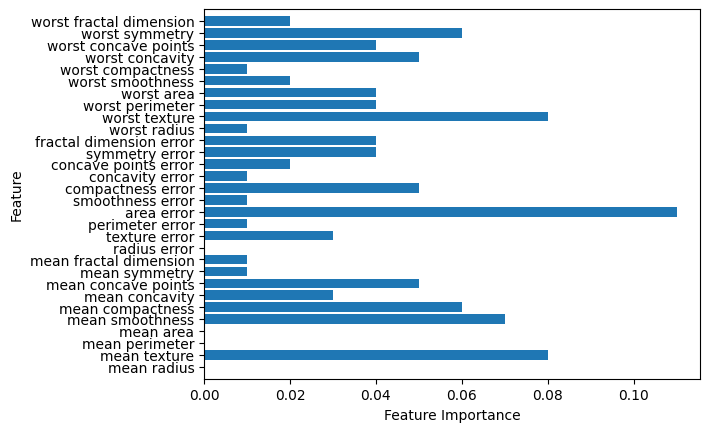

In [90]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.show()

### 히스토그램 기반 그레이디언트 부스팅 (Histogram-based Gradient Boosting)
- HistGradientBoostingClassifier와 HistGradientBoostingRegressor 클래스
- 히스토그램 기반 부스팅은 입력 특성을 256개의 구간으로 나누기 때문에 노드를 분할할 때 최적의 분할을 빠르게 찾을 수 있음
- 256개 구간 중 하나를 누락된 값을 위해서 사용하기 때문에 누락된 값을 위해 전처리 할 필요가 없음
- 일반적으로 샘플 갯수가 1만 개보다 많은 경우 그레이디언트 부스팅보다 히스토그램 기반 부스팅이 훨씬 빠름
- 모델의 성능을 높이려면 부스팅 횟수(트리 개수)를 지정하는 max_iter 매개변수(기본값 100) 값을 증가시킬 수 있음

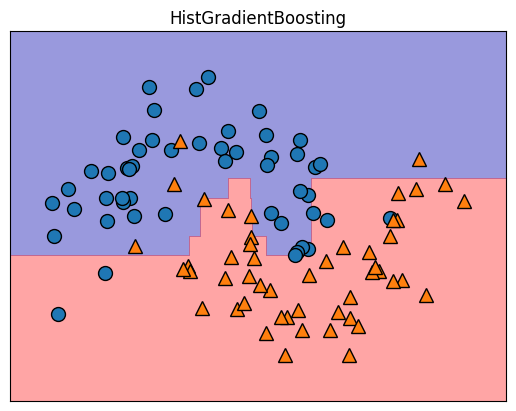

In [91]:
# two_moons 데이터셋에 기본 매개변수로 HistGradientBoostingClassifier를 적용하고 결정 경계를 그림
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(Xm_train, ym_train)

mglearn.plots.plot_2d_separator(hgb, Xm, fill=True, alpha=0.4)
plt.title("HistGradientBoosting")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show();

In [92]:
# cancer 데이터셋에 적용
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(Xc_train, yc_train)

print("Training Set Accuracy : {:.3f}".format(hgb.score(Xc_train, yc_train)))
print("Test Set Accuracy : {:.3f}".format(hgb.score(Xc_test, yc_test)))

Training Set Accuracy : 1.000
Test Set Accuracy : 0.979


- 테스트 세트 정확도는 에이다부스트보다는 낮지만 다른 앙상블 방법보다 좋은 결과를 제공
- scikit-learn의 히스토그램 기반 부스팅은 특성 중요도를 따로 제공하지 않음
- scikit-learn의 permutation_importance 함수를 사용하여 특성 중요도를 계산할 수 있음
- 이 함수는 특성 값을 차례대로 섞은 후 모델의 성능을 평가하여 어떤 특성이 중요한 역할을 하는지 계산
- 이 함수는 히스토그램 기반 부스팅뿐만 아니라 scikit-learn의 다른 모델에 모두 사용할 수 있음

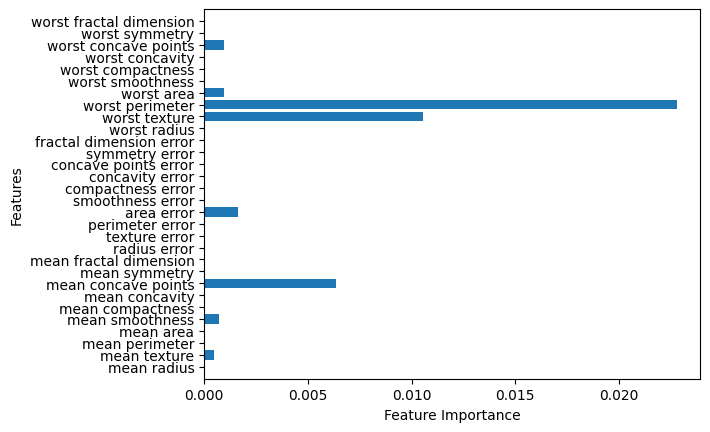

In [93]:
# 10번 씩 특성을 섞어서 cancer 데이터셋에서 훈련한 HistGradientBoostingClassifier 모델의 특성 중요도를 출력
# 출력된 특성 중요도를 보면 그레이디언트 부스팅과 비슷하게 일부 특성에 크게 의존
from sklearn.inspection import permutation_importance

result = permutation_importance(hgb, Xc_train, yc_train, n_repeats=10, random_state=42, n_jobs=-1)

plt.barh(range(n_features), result.importances_mean, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)
plt.show()

## 3.8. 커널 서포트 벡터 머신 (Kernelized Support Vector Machines)
### 선형 모델과 비선형 특성
- 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적
- 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제급하는 식으로 새로운 특성을 추가하는 것

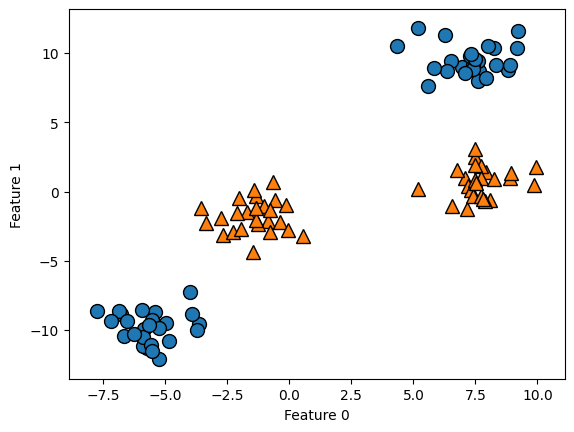

In [94]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


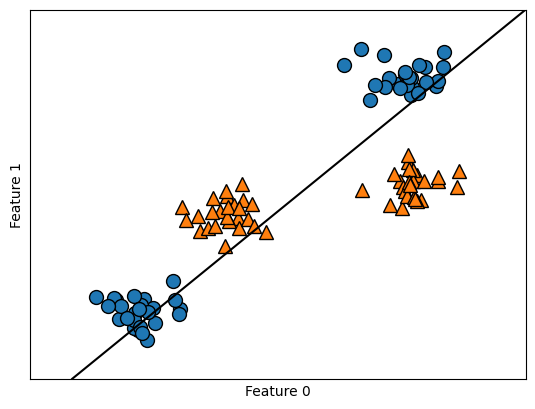

In [95]:
# 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어맞지 않음
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1");

C:\Users\ErYK\AppData\Local\Temp\ipykernel_28708\1769437750.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
C:\Users\ErYK\AppData\Local\Temp\ipykernel_28708\1769437750.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')


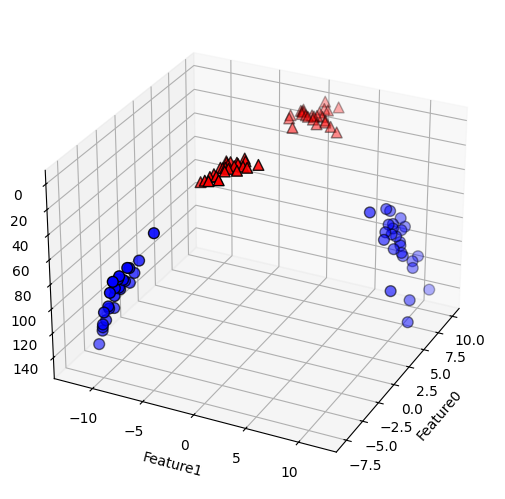

In [97]:
# 두 번째 특성을 제곱한 1 **2를 새로운 특성으로 추가해 입력 특성을 확장
# 이제 (특성0, 특성1) 2차원 데이터 포인트가 아니라 (특성0, 특성1, 특성1 **2)의 3차원 데이터 포인트로 표현
# 3차원 산점도로 나타냄
# 두 번째 특성을 제곱하여 추가
import matplotlib
import numpy as np

X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
if matplotlib.__version__ >= '3.4':
  # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4버전에서
  # deprecated 되었음
  # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고
  # figure.add_axes(ax)로 직접 추가
  ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
  figure.add_axes(ax)
else:
  ax - Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ** 2");

In [101]:
# 새로운 데이터셋에서는 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분할 수 있음
# 확장된 데이터 셋에서 선형 모델을 만들어 확인
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt,figure()
if matplotlib.__version__ >= '3.4':
  # Axes3D가 자동으로 그림에 추가되는 방식은 matplotlib 3.4버전에서
  # deprecated 됨
  # 이와 관련된 경고를 피하려면 auto_add_to_figure=False로 지정하고
  # figure.add_axes(ax)로 직접 추가
  ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
  figure.add_axes(ax)
else:
  ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")

c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


TypeError: 'Figure' object is not callable